In [ ]:
import torch
import random
import matplotlib.pyplot as plt


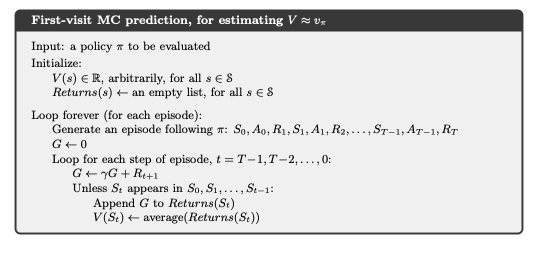

# build montecarlo

In [ ]:
size = 5
states = size * size
actions = 4
rewards = torch.tensor([1,0])

max_step = 500
discount_factor = 0.9
policy = torch.ones(size*size, 4) / 4   # uniform

terminal_state = 24


In [ ]:
def step_function(state,action):
  row,col  = state//size,state%size
  action_move = [
      lambda row, col: (max(0,row-1), col), # up
      lambda row, col: (min(size-1,row+1), col), # down
      lambda row, col: (row, max(col-1,0)), # left
      lambda row, col: (row, min(col+1,size-1)) # right
  ]
  new_row, new_col = action_move[action](row,col)
  new_state = new_row * size + new_col
  return new_state
# state, state_col, state_row = step_function(4,3)

In [ ]:
state = random.choice([i for i in range(0,size*size) if i != terminal_state])
states_,actions_, rewards_ = [state],[],[]
counter = 0


while state != terminal_state and counter < max_step:
  random_action = torch.multinomial(policy[state], num_samples=1).item()
  actions_.append(random_action)
  state = step_function(state, random_action)
  if state ==terminal_state:
    rewards_.append(1)
  else:
    rewards_.append(0)
  states_.append(state)
  counter+=1
len(rewards_)

36

In [ ]:
returns_ = torch.zeros(len(rewards_))
G = 0.0
for t in reversed(range(len(rewards_))):
    G = rewards_[t] + discount_factor * G
    returns_[t] = G

In [ ]:
len(states_),len(returns_)

(37, 36)

In [ ]:
returns_sum = torch.zeros(size*size)
returns_count = torch.zeros(size*size)
V = torch.zeros(size*size)
visited_states = set()

for state, G in zip(states_[:-1], returns_):
    if state not in visited_states:
      visited_states.add(state)
      # print(G, state)
      returns_sum[state] += G
      returns_count[state] += 1
      V[state] = returns_sum[state] / returns_count[state]
V_grid = V.view(size, size)
V_grid

tensor([[0.0000, 0.0000, 0.2824, 0.2542, 0.3874],
        [0.0000, 0.0278, 0.0250, 0.2288, 0.5314],
        [0.0798, 0.0309, 0.0985, 0.8100, 0.6561],
        [0.0471, 0.0343, 0.0382, 0.9000, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.0000, 0.0000]])

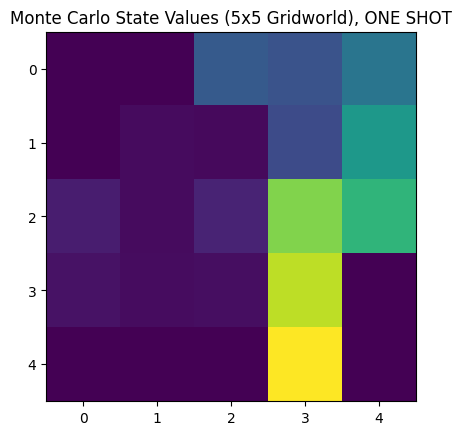

In [ ]:
plt.imshow(V_grid.numpy(), cmap="viridis")
plt.title("Monte Carlo State Values (5x5 Gridworld), ONE SHOT")
plt.show()

# make it programmatic

In [ ]:
def generate_episode(terminal_state, max_step, size,discount_factor=0.9, num_actions = 4, policy = torch.ones(25, 4) / 4,initial_state = None):
  counter = 0
  if not initial_state:
    state = random.choice([i for i in range(0,size*size) if i != terminal_state])
    states_,actions_, rewards_ = [state],[],[]
  else:
    state = initial_state
    states_,actions_, rewards_ = [state],[],[]
  while state != terminal_state and counter < max_step:

    random_action = torch.multinomial(policy[state], num_samples=1).item()

    actions_.append(random_action)
    state = step_function(state, random_action)
    if state ==terminal_state:
      rewards_.append(1)
    else:
      rewards_.append(0)
    states_.append(state)
    counter+=1
  return rewards_, actions_, states_

def compute_returns(rewards,discount_factor=0.9):
  G = 0.0
  returns_ = torch.zeros(len(rewards))
  for t in reversed(range(len(rewards))):
    G = rewards[t] + discount_factor * G
    returns_[t] = G
  return returns_


def compute_state_values(states, returns, V, returns_sum, returns_count, size = 5):

  visited_states = set()

  for state, G in zip(states[:-1], returns):
      if state not in visited_states:
        visited_states.add(state)
        # print(G, state)
        returns_sum[state] += G
        returns_count[state] += 1
        V[state] = returns_sum[state] / returns_count[state]
  return V, returns_sum, returns_count

def compute_action_values(states, actions, returns, Q, returns_sum, returns_count, size=5, num_actions=4):
    visited_pairs = set()

    for state, G, action in zip(states[:-1], returns, actions):
        if (state, action) not in visited_pairs:
            visited_pairs.add((state, action))

            returns_sum[state, action] += G
            returns_count[state, action] += 1
            Q[state, action] = returns_sum[state, action] / returns_count[state, action]

    return Q, returns_sum, returns_count

In [ ]:
###########
# CONFIG  #
###########
returns_sum_V = torch.zeros(size*size)
returns_count_V = torch.zeros(size*size)
V = torch.zeros(size*size)
policy = torch.ones(size*size, 4) / 4   # uniform


num_actions = 4
terminal_state = 24
size= 5
V = torch.zeros(size*size)
episodes = 100

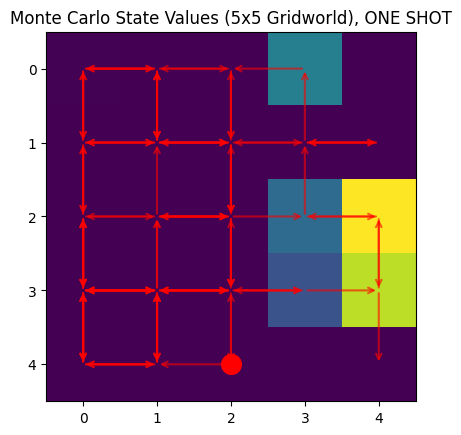

In [ ]:
###############################################
# KEEP PRESSING THIS and see the evolution!   #
###############################################

rewards, actions, states = generate_episode(24, 1000, 5, policy = policy )
returns = compute_returns(rewards,discount_factor=0.9)
V, returns_sum, returns_count = compute_state_values(states,returns, V, returns_sum_V, returns_count_V)

# ------
fig,ax = plt.subplots()

ax.imshow(V.view(size,size).numpy(), cmap="viridis")
ax.set_title("Monte Carlo State Values (5x5 Gridworld), ONE SHOT")


for i in range(len(states) - 1):
    s_current = states[i]
    s_next = states[i + 1]

    r_current, c_current = s_current // size, s_current % size
    r_next, c_next = s_next // size, s_next % size

    ax.annotate('',
                xy=(c_next, r_next),  # end point
                xytext=(c_current, r_current),  # start point
                arrowprops=dict(arrowstyle='->', lw=1.5, color='red', alpha=0.6))
start_state = states[0]
start_row = start_state // size
start_col = start_state % size
ax.scatter(start_col, start_row, c='red', s=200, marker='o')  # Mark starting point



plt.show()

# iteration to calculate the state values
let's continue with iterations

In [ ]:
###########
# CONFIG  #
###########

num_actions = 4
terminal_state = 24
size= 5
V = torch.zeros(size*size)
episodes = 100


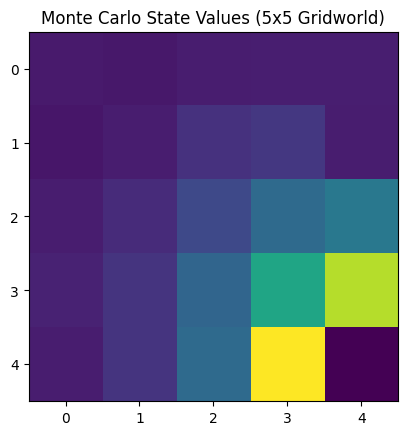

In [ ]:
for episode in range(episodes):
    rewards_, actions_, states_ = generate_episode(terminal_state, max_step=100, size=size, discount_factor=0.9,num_actions=num_actions)
    returns_ = compute_returns(rewards_, discount_factor=0.9)
    V, returns_sum, returns_count= compute_state_values(states_, returns_, V, returns_sum_V, returns_count_V,size)
V_grid = V.view(size,size)
V_grid

plt.imshow(V_grid.numpy(), cmap="viridis")
plt.title("Monte Carlo State Values (5x5 Gridworld)")
plt.show()


In [ ]:
# def first_visit_mc_prediction(num_episodes=5000, size=5, gamma=0.9, terminal_state=24, max_step=100):
#     num_states = size * size
#     num_actions = 4
#
#     # Initialize value estimates and Returns(s) lists
#     V = torch.zeros(num_states)
#     Returns = [[] for _ in range(num_states)]
#
#     for episode in range(num_episodes):
#         # --- Generate one episode following a (random) policy ---
#         rewards, actions, states = generate_episode(
#             terminal_state=terminal_state,
#             max_step=max_step,
#             size=size,
#             num_actions=num_actions,
#             discount_factor=gamma
#         )
#
#         G = 0.0
#         visited = set()
#
#         # --- Work backwards through the episode ---
#         for t in reversed(range(len(states) - 1)):  # skip terminal
#             G = gamma * G + rewards[t]
#             s_t = states[t]
#
#             # --- "Unless S_t appears in S_0,...,S_{t-1}" ---
#             if s_t not in visited:
#                 visited.add(s_t)
#                 Returns[s_t].append(G) # append G to the returns of that specific state
#                 V[s_t] = torch.tensor(Returns[s_t]).mean() # calculate the average of the returns for that specific state and put it into the value of that specific state
#
#     return V.view(size, size)

# policy improvement
let's first calculate the action value, than we apply the classical Dynamic Programming rule to update the policy, we take for each status a DETERMINISTIC policy that just takes sets the state value to the maximum action value.

In [ ]:
returns_sum_V = torch.zeros(size*size)
returns_count_V = torch.zeros(size*size)
V = torch.zeros(size*size)

returns_sum_Q = torch.zeros(size * size, num_actions)
returns_count_Q = torch.zeros(size * size, num_actions)
Q = torch.zeros(size * size, num_actions)

policy = torch.ones(size*size, 4) / 4   # uniform

In [ ]:
###########
# CONFIG  #
###########

num_actions = 4
terminal_state = 24
size= 5
V = torch.zeros(size*size)
episodes = 100
max_step = 100
discount_factor = 0.9

In [ ]:
def policy_improvement(Q):
    num_states, num_actions = Q.shape
    policy = torch.zeros(num_states, num_actions)
    best_actions = torch.argmax(Q, dim=1) # take the best actions for each one of the states, the best actions is the one that maximizes the action value at a certain states

    for s in range(num_states):
        policy[s, best_actions[s]] = 1.0  # set the best action to 1

    return policy

def policy_evaluation(returns_sum_V, returns_count_V,V, returns_sum_Q, returns_count_Q, Q, policy):
  for episode in range(episodes):
    rewards_, actions_, states_ = generate_episode(terminal_state, max_step=max_step, size=size, discount_factor=discount_factor,num_actions=num_actions, policy = policy)
    returns_ = compute_returns(rewards_, discount_factor=discount_factor)
    V, returns_sum, returns_count = compute_state_values(states_, returns_,V, returns_sum_V, returns_count_V, size)
    Q, returns_sum, returns_count = compute_action_values(states_, actions_, returns_,Q, returns_sum_Q, returns_count_Q )
  return V, Q,returns_sum, returns_count,returns_sum, returns_count,policy,rewards_, actions_, states_


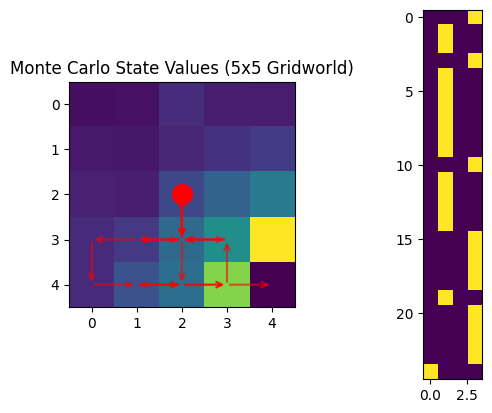

In [ ]:
###############################################
# KEEP PRESSING THIS and see the evolution!   #
###############################################


# ----- policy evaluation with Monte Carlo --------
V, Q,returns_sum, returns_count,returns_sum, returns_count,policy,rewards_, actions_, states_ = policy_evaluation(returns_sum_V, returns_count_V,V, returns_sum_Q, returns_count_Q, Q, policy)
state_values, action_values = V,Q
# ----- policy improvement --------
policy = policy_improvement(action_values)


# ----- visualization --------
fig,ax = plt.subplots(1,2)

ax[0].imshow(state_values.view(size,size).numpy(), cmap="viridis")
ax[0].set_title("Monte Carlo State Values (5x5 Gridworld)")

for i in range(len(states_) - 1):
    s_current = states_[i]
    s_next = states_[i + 1]

    r_current, c_current = s_current // size, s_current % size
    r_next, c_next = s_next // size, s_next % size

    ax[0].annotate('',
                xy=(c_next, r_next),  # end point
                xytext=(c_current, r_current),  # start point
                arrowprops=dict(arrowstyle='->', lw=1.5, color='red', alpha=0.6))
start_state = states_[0]
start_row = start_state // size
start_col = start_state % size
ax[0].scatter(start_col, start_row, c='red', s=200, marker='o')  # Mark starting point

ax[1].imshow(policy)

plt.show()


## RECAP: Policy Improvement Theorem

Once you have computed $Q^\pi(s,a)$ for your current policy $\pi$, you can improve the policy by:

For each state $s$, set the new policy to choose the action that has the highest Q-value:

$$\pi'(s) = \arg\max_a Q^\pi(s,a)$$

This new policy $\pi'$ is guaranteed to be at least as good as the old policy $\pi$.

---

## For the Optimal Policy

When the policy is optimal (and deterministic), the state value equals the maximum action value:

$$V^*(s) = \max_a Q^*(s,a)$$

And the optimal policy simply picks the action with that maximum Q-value:

$$\pi^*(s) = \arg\max_a Q^*(s,a)$$

# make it epsilon greedy

In [ ]:
# now instead of starting randomly, we make the policy epsilon greedy, this way the agent will explore a bit

In [ ]:
returns_sum_V = torch.zeros(size*size)
returns_count_V = torch.zeros(size*size)
V = torch.zeros(size*size)

returns_sum_Q = torch.zeros(size * size, num_actions)
returns_count_Q = torch.zeros(size * size, num_actions)
Q = torch.zeros(size * size, num_actions)

policy = torch.ones(size*size, 4) / 4   # uniform





In [ ]:
###########
# CONFIG  #
###########
######################################################
# change these values to see how the agent reacts!   #
######################################################
num_actions = 4
initial_state = 1
terminal_state = 24
size= 5
V = torch.zeros(size*size)
episodes = 100
max_step = 100
discount_factor = 0.9
epsilon = 0.3


In [ ]:
def policy_improvement(Q, epsilon = 0.1):
    num_states, num_actions = Q.shape
    new_policy = torch.zeros(num_states, num_actions)
    best_actions = torch.argmax(Q, dim=1) # take the best actions for each one of the states, the best actions is the one that maximizes the action value at a certain states

    for s in range(num_states):
        best_action = Q[s].argmax(0).item()

        for a in range(num_actions):
            if a == best_action:
                new_policy[s, a] = 1.0 - epsilon + (epsilon / num_actions)
            else:
                new_policy[s, a] = epsilon / num_actions
    return new_policy

# set the generate_episode parameter to exploring_start to False
def policy_evaluation(returns_sum_V, returns_count_V,V, returns_sum_Q, returns_count_Q, Q, policy):
  for episode in range(episodes):
    rewards_, actions_, states_ = generate_episode(terminal_state, max_step=max_step, size=size, discount_factor=discount_factor,num_actions=num_actions, policy = policy, initial_state = initial_state)
    returns_ = compute_returns(rewards_, discount_factor=discount_factor)
    V, returns_sum, returns_count = compute_state_values(states_, returns_,V, returns_sum_V, returns_count_V, size) # this changes the globals returns_sum,returns_count,V
    Q, returns_sum, returns_count = compute_action_values(states_, actions_, returns_,Q, returns_sum_Q, returns_count_Q )
  return V, Q,returns_sum, returns_count,returns_sum, returns_count,policy,rewards_, actions_, states_



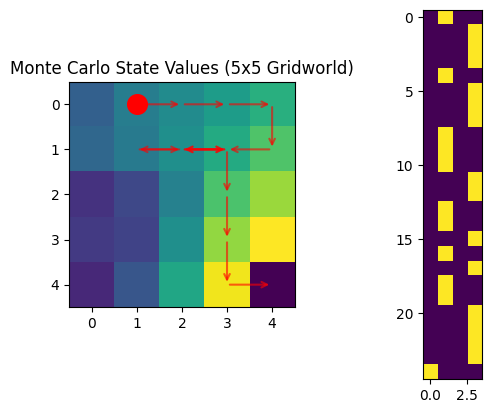

In [ ]:
###############################################
# KEEP PRESSING THIS and see the evolution!   #
###############################################


# ----- policy evaluation with Monte Carlo --------
V, Q,returns_sum, returns_count,returns_sum, returns_count,policy,rewards_, actions_, states_ = policy_evaluation(returns_sum_V, returns_count_V,V, returns_sum_Q, returns_count_Q, Q, policy)
state_values, action_values = V,Q
# ----- policy improvement --------
policy = policy_improvement(action_values, epsilon = epsilon)


# ----- visualization --------
fig,ax = plt.subplots(1,2)

ax[0].imshow(state_values.view(size,size).numpy(), cmap="viridis")
ax[0].set_title("Monte Carlo State Values (5x5 Gridworld)")

for i in range(len(states_) - 1):
    s_current = states_[i]
    s_next = states_[i + 1]

    r_current, c_current = s_current // size, s_current % size
    r_next, c_next = s_next // size, s_next % size

    ax[0].annotate('',
                xy=(c_next, r_next),  # end point
                xytext=(c_current, r_current),  # start point
                arrowprops=dict(arrowstyle='->', lw=1.5, color='red', alpha=0.6))
start_state = states_[0]
start_row = start_state // size
start_col = start_state % size
ax[0].scatter(start_col, start_row, c='red', s=200, marker='o')  # Mark starting point

ax[1].imshow(policy)

plt.show()


# behavioral policy